# Brain Tumor Image Dataset
### https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/data

#### The required task is to peform segmentation (or pixel level classification) for brain tumor images to identify tumor regions accurately.

#### The dataset is split into training data, validation data, and test data. The segmentation model is supposed to learn the features in the images from the training data, and the model performance is monitored on the validation data after each epoch of learning. Once the model weights are finalized, the model performance is quantified using the test data.

In [24]:
import kagglehub
import json
import cv2
from google.colab.patches import cv2_imshow
from pycocotools.coco import COCO
import numpy as np

#### Download dataset and copy to desired location. You can also save the dataset on your system locally from Kaggle.

In [2]:
path = kagglehub.dataset_download("pkdarabi/brain-tumor-image-dataset-semantic-segmentation")
print("Path to dataset files:", path)

100%|██████████| 83.7M/83.7M [00:01<00:00, 69.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1


In [3]:
!mkdir /content/brain_tumor_dataset
!cp -r /root/.cache/kagglehub/datasets/pkdarabi /content/brain_tumor_dataset/

#### This data does not persist beyond the current session for Google Colab and Kaggle notebooks. To save data permanently, you can mount your Google Drive on to the session and save data on it.

#### To do this for Kaggle, look at this link,
https://www.kaggle.com/code/nicholasdunham/saving-and-persisting-data-in-kaggle



```
# Mounting GDrive to save data permanently
from google.colab import drive
drive.mount('/content/drive')

# Now you can save files to /content/drive which will persist beyond the current session.
```



#### The OpenCV package can be used to convert the training data from JPG format to NumPy arrays.

(640, 640, 3)
<class 'numpy.ndarray'>


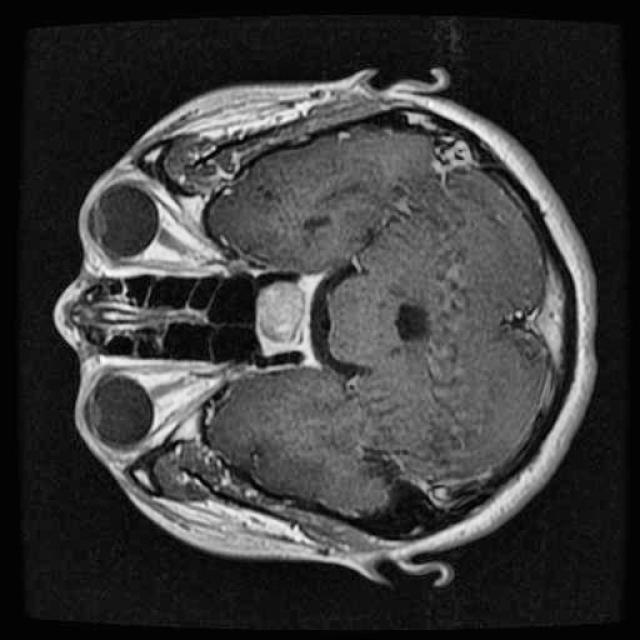

In [15]:
image = cv2.imread('/content/brain_tumor_dataset/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1/train/1000_jpg.rf.1c16148495900a466a53f121ec6af0a9.jpg')
print(image.shape)
print(type(image))
cv2_imshow(image)

#### The dataset is accompanied by one COCO format annotation JSON file each for the training, validation, and test dataset. This file contains the labeling information for the training and validation data. You need to read this file, and create "masks" that would allow you to label your data for the segmentation task.
https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch/#coco-dataset-format

In [ ]:
with open('/content/brain_tumor_dataset/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1/train/_annotations.coco.json', 'r') as file:
    data = json.load(file)
data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

#### The annotations field contains information about the segmentation masks. The relevant field for this project is the 'segmentation' field, which lists the coordinates of a polygon within which each pixel is labeled "1" and every other pixel is labeled "0". The bbox field is related to object detection, and not necessary for segmentation.

In [ ]:
data['annotations'][17]

{'id': 17,
 'image_id': 17,
 'category_id': 2,
 'bbox': [286, 160, 188.75, 166.25],
 'area': 31379.688,
 'segmentation': [[475,
   160,
   286.25,
   160,
   286.25,
   326.25,
   475,
   326.25,
   475,
   160]],
 'iscrowd': 0}

#### The images field contains information about the image location for each index, and its properties.

In [ ]:
data['images'][0]

{'id': 0,
 'license': 1,
 'file_name': '2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2023-08-19T04:37:54+00:00'}

#### The pycocotools package can be used to load and parse COCO format annotation files

In [23]:
# Paths
annotationPath = '/content/brain_tumor_dataset/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1/train/_annotations.coco.json'
imagesDir = '/content/brain_tumor_dataset/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1/train'

#Specify ID of image
singleImageID = 10

# Load COCO annotations
cocoAnnotations = COCO(annotationPath)

# Load single image info and read the image
imgInfo = cocoAnnotations.loadImgs(singleImageID)[0]
imgPath = imagesDir + '/' + imgInfo['file_name']
print(f'Path of image selected -- {imgPath}')
img = cv2.imread(imagesDir + '/' + imgInfo['file_name'])
height, width = image.shape[:2]
print(f'Image dimensions -- {height} x {width}')

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Path of image selected -- /content/brain_tumor_dataset/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1/train/2433_jpg.rf.3cdf8e4cb3a08e9b2fccc6c6082c2344.jpg
Image dimensions -- 640 x 640


In [35]:
# Initiate an empty mask
mask = np.zeros((height, width), dtype=np.uint8)

# Get all annotations for the specified image (generally images can have multiple annotations)
annotationID = cocoAnnotations.getAnnIds(imgIds=singleImageID)
annotation = cocoAnnotations.loadAnns(annotationID)

annotation[0]['segmentation']

[[327.5, 225, 217.5, 225, 217.5, 323.75, 327.5, 323.75, 327.5, 225]]

## Instructions




Write a UNet model to tag pixels belonging to tumor regions in the MRI images for the test dataset. You can do this on your system, on Google Colab, or on a Kaggle notebook. Note that Google Colab and Kaggle notebooks allow some GPU hours for free.

Original U-Net paper: https://arxiv.org/pdf/1505.04597

*   Push code to GitHub often.
*   Develop model from scratch in **Tensorflow 2**, do not use pre-defined architectures.
* Code should be well commented.
*   Clearly define performance metrics and calculate them for the test dataset provided. (Pixel accuracy is a good starting point.)
* Use GPU resources provided by Colab or Kaggle if needed.
* If possible, write code in an object oriented fashion, with individual classes defined for the model, training routine, training criterion and dataloader. The model training can be performed as a script or on a notebook.
* If possible, save the final version of the model in a .h5 file.
* Do NOT validate the model on test data. Only use the test data after you have finalized your model weights.